In [1]:
!pip install rembg onnxruntime opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00


In [103]:
from rembg import remove
from PIL import Image
import io

input_path = '/content/p1.jpg'
output_path = 'p1_nobg.png'

with open(input_path, 'rb') as i:
    input_data = i.read()
    output_data = remove(input_data)

with open(output_path, 'wb') as o:
    o.write(output_data)

print("Background removed successfully!")


Background removed successfully!


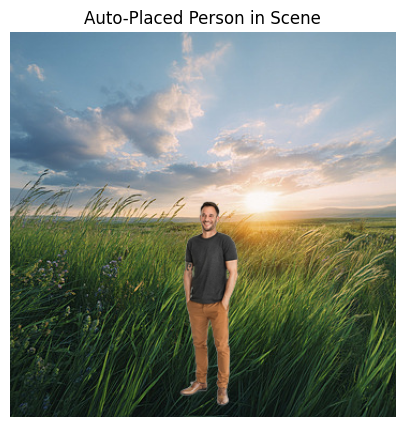

In [45]:
from PIL import Image
import matplotlib.pyplot as plt

# Load images
bg_path = "/content/bg.jpg"
fg_path = "/content/p2_nobg.png"

background = Image.open(bg_path).convert("RGBA")
foreground = Image.open(fg_path).convert("RGBA")

# Get dimensions
bg_width, bg_height = background.size
fg_width, fg_height = foreground.size

# Scale foreground to be ~60% of background height
target_fg_height = int(bg_height * 0.6)
scaling_factor = target_fg_height / fg_height
target_fg_width = int(fg_width * scaling_factor)

# Resize foreground
foreground = foreground.resize((target_fg_width, target_fg_height), resample=Image.LANCZOS)

# Position the person: horizontally center, bottom-aligned with margin
margin_bottom = 0
x = (bg_width - target_fg_width) // 2
y = bg_height - target_fg_height - margin_bottom

# Paste person onto background using alpha channel
composite = background.copy()
composite.paste(foreground, (x, y), foreground)

# Save and show
composite.save("final_composite_auto.png")

plt.figure(figsize=(10, 5))
plt.imshow(composite)
plt.title("Auto-Placed Person in Scene")
plt.axis('off')
plt.show()


### shadow

Detected Shadow Type: Hard Shadow


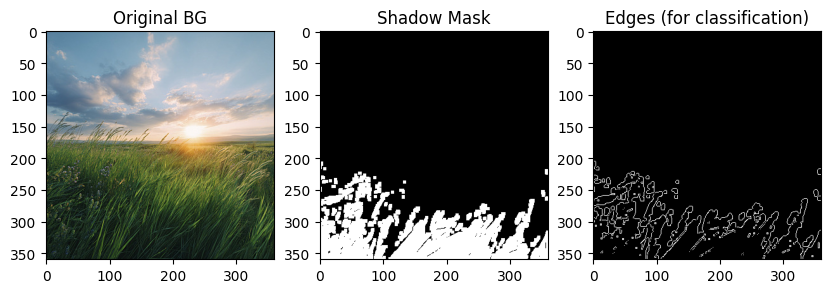

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert background to grayscale
bg_path = "bg.jpg"
bg_img = cv2.imread(bg_path)
gray = cv2.cvtColor(bg_img, cv2.COLOR_BGR2GRAY)

# Step 1: Shadow detection using thresholding
# Shadows are darker than surroundings
_, shadow_mask = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)  # Tune threshold

# Optional: Morphological operations to clean up
kernel = np.ones((5, 5), np.uint8)
shadow_mask_clean = cv2.morphologyEx(shadow_mask, cv2.MORPH_OPEN, kernel)

# Step 2: Shadow classification
# Edge detection
edges = cv2.Canny(shadow_mask_clean, 50, 150)

# Measure edge sharpness (amount of edges)
edge_density = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])

# Classify based on edge density or edge gradient sharpness
shadow_type = "Hard Shadow" if edge_density > 0.01 else "Soft Shadow"

print("Detected Shadow Type:", shadow_type)

# Show detected shadow mask
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(bg_img, cv2.COLOR_BGR2RGB))
plt.title("Original BG")

plt.subplot(1, 3, 2)
plt.imshow(shadow_mask_clean, cmap='gray')
plt.title("Shadow Mask")

plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title("Edges (for classification)")
plt.show()


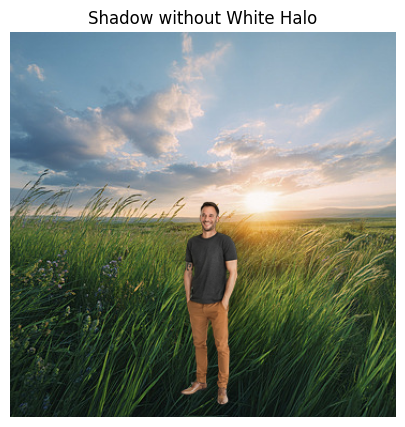

In [142]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import matplotlib.pyplot as plt

# Load images
bg = Image.open("bg.jpg").convert("RGBA")
person = Image.open("p2_nobg.png").convert("RGBA")

# Resize person
bg_width, bg_height = bg.size
p_width, p_height = person.size
target_h = int(bg_height * 0.6)
scale = target_h / p_height
p_resized = person.resize((int(p_width * scale), target_h), Image.LANCZOS)

# Brightness correction
enhancer = ImageEnhance.Brightness(p_resized)
p_resized = enhancer.enhance(0.98)

# Extract alpha and make shadow
alpha = p_resized.split()[3]
shadow = Image.new("RGBA", p_resized.size, (0, 0, 0, 150))
shadow.putalpha(alpha)
blur_radius = int(p_resized.height * 0.1)
shadow = shadow.filter(ImageFilter.GaussianBlur(blur_radius))

# Offsets
offset_x = int(p_resized.width * 0.08)
offset_y = int(p_resized.height * 0.08)

# Create a temporary transparent canvas for shadow and person
temp_layer = Image.new("RGBA", bg.size, (0, 0, 0, 0))
px = (bg_width - p_resized.width) // 2
py = bg_height - p_resized.height

# Paste shadow and person onto the transparent canvas
temp_layer.paste(shadow, (px + offset_x, py + offset_y), shadow)
temp_layer.paste(p_resized, (px, py), p_resized)

# Use alpha_composite for proper blending
composite = Image.alpha_composite(bg, temp_layer)

# Save and display
composite.save("composite_clean_shadow.png")
plt.figure(figsize=(10, 5))
plt.imshow(composite)
plt.axis('off')
plt.title("Shadow without White Halo")
plt.show()


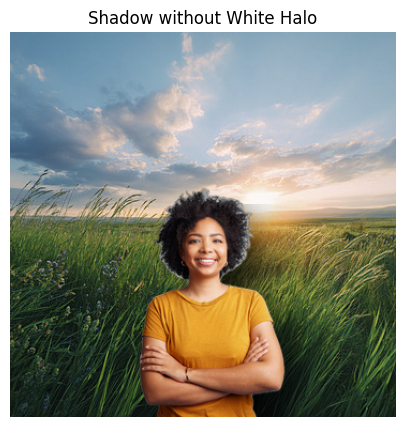

In [141]:
from PIL import Image, ImageFilter, ImageOps, ImageEnhance
import matplotlib.pyplot as plt

# Load images
bg = Image.open("bg.jpg").convert("RGBA")
person = Image.open("p1_nobg.png").convert("RGBA")

# Resize person
bg_width, bg_height = bg.size
p_width, p_height = person.size
target_h = int(bg_height * 0.6)
scale = target_h / p_height
p_resized = person.resize((int(p_width * scale), target_h), Image.LANCZOS)

# Brightness correction
enhancer = ImageEnhance.Brightness(p_resized)
p_resized = enhancer.enhance(0.98)

# Extract alpha and make shadow
alpha = p_resized.split()[3]
shadow = Image.new("RGBA", p_resized.size, (0, 0, 0, 150))
shadow.putalpha(alpha)
blur_radius = int(p_resized.height * 0.1)
shadow = shadow.filter(ImageFilter.GaussianBlur(blur_radius))

# Offsets
offset_x = int(p_resized.width * 0.08)
offset_y = int(p_resized.height * 0.08)

# Create a temporary transparent canvas for shadow and person
temp_layer = Image.new("RGBA", bg.size, (0, 0, 0, 0))
px = (bg_width - p_resized.width) // 2
py = bg_height - p_resized.height

# Paste shadow and person onto the transparent canvas
temp_layer.paste(shadow, (px + offset_x, py + offset_y), shadow)
temp_layer.paste(p_resized, (px, py), p_resized)

# Use alpha_composite for proper blending
composite = Image.alpha_composite(bg, temp_layer)

# Save and display
composite.save("composite_clean_shadow1.png")
plt.figure(figsize=(10, 5))
plt.imshow(composite)
plt.axis('off')
plt.title("Shadow without White Halo")
plt.show()


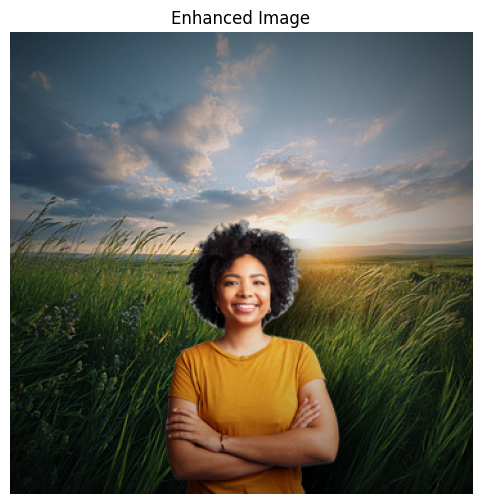

In [140]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

def adjust_image(image_path):
    # === Load Image ===
    image = Image.open(image_path).convert("RGB")
    img = np.array(image)

    # === Exposure (simulate by brightness) ===
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1.1)  # 1.0 = original

    # === Highlights & Shadows (simulate via gamma) ===
    def adjust_highlight_shadow(img, gamma=0.5):
        inv_gamma = 1.0 / gamma
        table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
        return cv2.LUT(img, table)

    img = np.array(image)
    img = adjust_highlight_shadow(img, gamma=0.9)  # lower gamma brightens shadows

    # === Contrast ===
    image = Image.fromarray(img)
    image = ImageEnhance.Contrast(image).enhance(1.0)

    # === Brightness ===
    image = ImageEnhance.Brightness(image).enhance(1.05)


    # === Saturation ===
    image = Image.fromarray(img)
    image = ImageEnhance.Color(image).enhance(1.3)


    # === Sharpness ===
    image = Image.fromarray(img)
    image = ImageEnhance.Sharpness(image).enhance(1.5)

    # === Definition (edge enhancement) ===
    image = image.filter(ImageFilter.EDGE_ENHANCE_MORE)


    # === Vignette Effect ===
    rows, cols = img.shape[:2]
    kernel_x = cv2.getGaussianKernel(cols, cols / 2)
    kernel_y = cv2.getGaussianKernel(rows, rows / 2)
    kernel = kernel_y * kernel_x.T
    mask = 255 * kernel / np.linalg.norm(kernel)
    vignette = np.zeros_like(img)
    for i in range(3):
        vignette[..., i] = img[..., i] * mask
    vignette = np.clip(vignette, 0, 255).astype(np.uint8)

    # === Show Result ===
    plt.figure(figsize=(12, 6))
    plt.imshow(vignette)
    plt.axis('off')
    plt.title('Enhanced Image')
    plt.show()

    # === Save Output ===
    Image.fromarray(vignette).save("adjusted_output.jpg")

# === Run ===
adjust_image("/content/composite_clean_shadow.png")


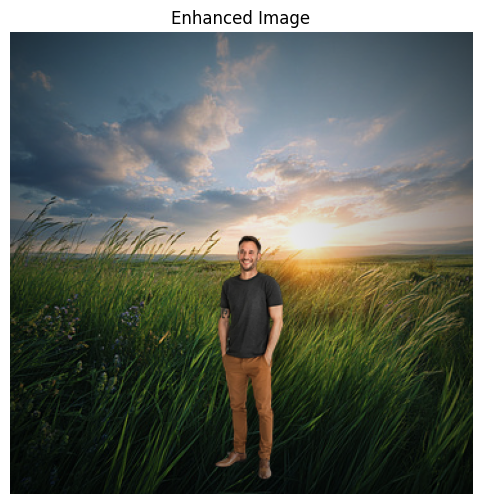

In [143]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt

def adjust_image(image_path):
    # === Load Image ===
    image = Image.open(image_path).convert("RGB")
    img = np.array(image)

    # === Exposure (simulate by brightness) ===
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1.1)  # 1.0 = original

    # === Highlights & Shadows (simulate via gamma) ===
    def adjust_highlight_shadow(img, gamma=0.5):
        inv_gamma = 1.0 / gamma
        table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
        return cv2.LUT(img, table)

    img = np.array(image)
    img = adjust_highlight_shadow(img, gamma=0.9)  # lower gamma brightens shadows

    # === Contrast ===
    image = Image.fromarray(img)
    image = ImageEnhance.Contrast(image).enhance(1.0)

    # === Brightness ===
    image = ImageEnhance.Brightness(image).enhance(1.05)


    # === Saturation ===
    image = Image.fromarray(img)
    image = ImageEnhance.Color(image).enhance(1.3)


    # === Sharpness ===
    image = Image.fromarray(img)
    image = ImageEnhance.Sharpness(image).enhance(1.5)

    # === Definition (edge enhancement) ===
    image = image.filter(ImageFilter.EDGE_ENHANCE_MORE)


    # === Vignette Effect ===
    rows, cols = img.shape[:2]
    kernel_x = cv2.getGaussianKernel(cols, cols / 2)
    kernel_y = cv2.getGaussianKernel(rows, rows / 2)
    kernel = kernel_y * kernel_x.T
    mask = 255 * kernel / np.linalg.norm(kernel)
    vignette = np.zeros_like(img)
    for i in range(3):
        vignette[..., i] = img[..., i] * mask
    vignette = np.clip(vignette, 0, 255).astype(np.uint8)

    # === Show Result ===
    plt.figure(figsize=(12, 6))
    plt.imshow(vignette)
    plt.axis('off')
    plt.title('Enhanced Image')
    plt.show()

    # === Save Output ===
    Image.fromarray(vignette).save("adjusted_output.jpg")

# === Run ===
adjust_image("/content/composite_clean_shadow.png")
